In [1]:
import numpy as np
from scipy.io import loadmat

#  Question 1
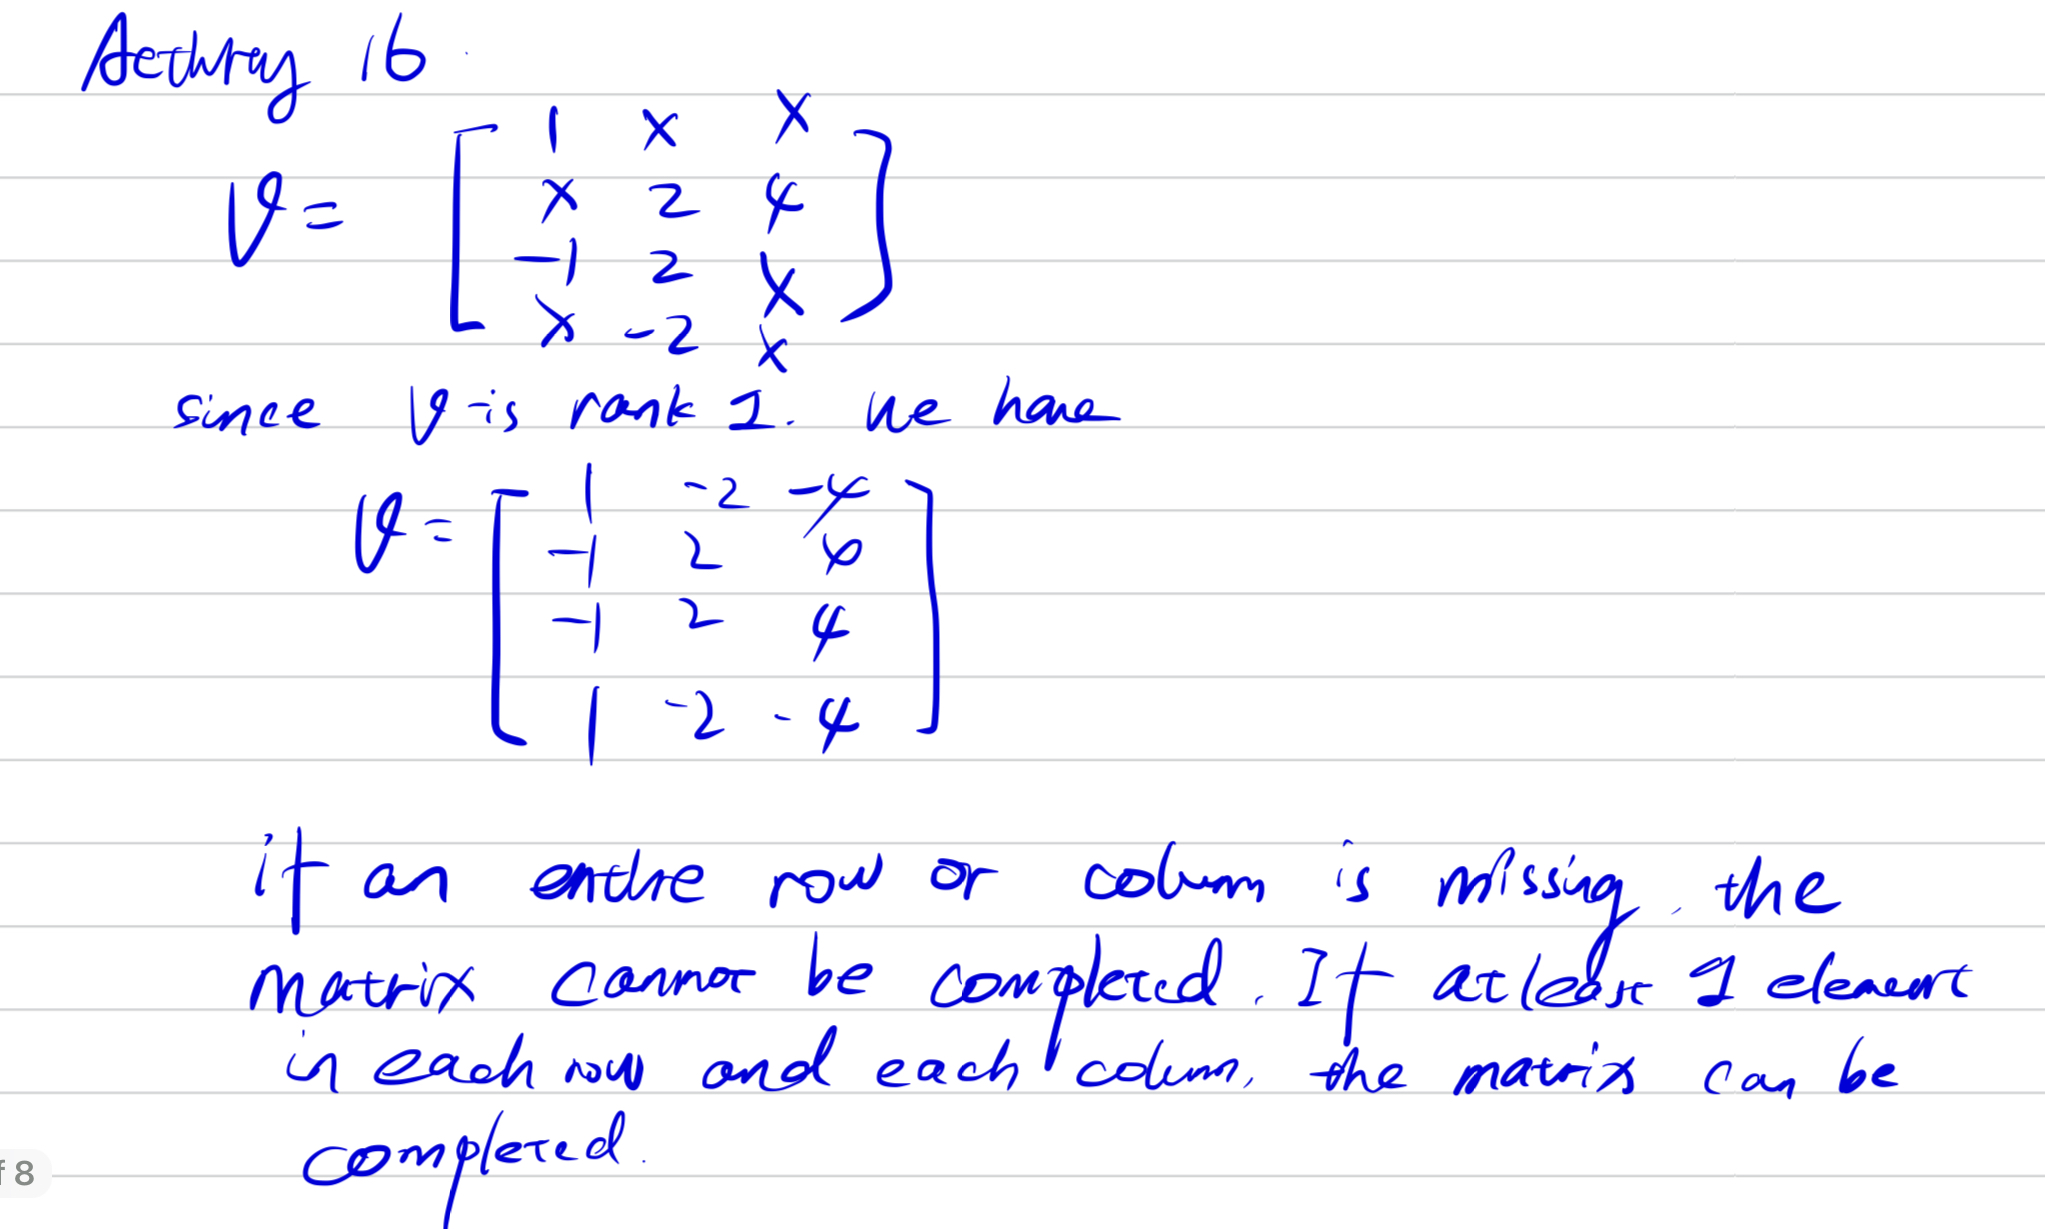

---
# Question 2
---

In [2]:
Xtrue = loadmat("incomplete.mat")["Xtrue"]
Y1 = loadmat("incomplete.mat")["Y1"]
Y2 = loadmat("incomplete.mat")["Y2"]
Y3 = loadmat("incomplete.mat")["Y3"]

In [15]:
def ItSingValThresh(Y, r):
    """
    Iterative Singular Value Thresholding function for Matrix Completion
    """
    tol = 10**(-3)  # difference between iterates at termination
    max_its = 100;
    n,p = Y.shape 
    X = np.array(Y) #make a copy so operations do not mutate the original
    X[np.isnan(X)] = 0 # Fill in missing entries with zeros

    err = 10**6 
    itt = 0
    
    while err > tol and itt < max_its:
        U,s,VT = np.linalg.svd(X, full_matrices=False)
        V, S = VT.T, np.diag(s[:r])
        Xnew = U[:, :r] @ S @ V[:r, :]
        for i in range(n):
            for j in range(p):
                if ~np.isnan(Y[i,j]):  #replace Xnew with known entries
                    Xnew[i,j] = Y[i,j]
        err = np.linalg.norm(X-Xnew,'fro') 
        X = Xnew
        itt += 1
    return X,err

In [17]:
ItSingValThresh(Y1, r = 2)

(array([[ 13.34801383,   2.07494214,  24.        ,   8.        ,
          12.        ,  14.        ,   0.9080808 ,   8.79175827,
          22.        ,  -2.53286611,   8.15733297,  10.        ,
          14.        ,  24.        ,   4.75476321,  44.12966246],
        [ 34.82366273,  21.        ,  -5.50731682,   6.56318656,
          -7.76854   ,  -6.90435054, -15.96890788,   0.24617978,
           8.98816058,  15.        ,  17.        , -18.56630227,
           8.        ,  15.        ,  23.        ,  11.93952774],
        [  5.77363422,   0.57848322,  -1.65513845,   0.56458148,
           9.        ,   0.77270917,  -2.04309902,   0.78878167,
          -0.6637554 ,   9.        ,   8.        ,  -1.91659983,
           5.        ,  -1.66518956,   0.45449842,   6.        ],
        [ 38.70218806,   3.69330682,  -9.36628752,  10.        ,
          -8.00263713,   0.71317317, -15.10353699,   3.54507945,
          23.        ,  10.95716168,  17.        , -15.55339038,
          16.88122675,

In [18]:
ItSingValThresh(Y2, r = 2)

(array([[ 30.        ,  -0.35723147,  24.        ,   8.        ,
          12.        ,  14.        ,  12.        ,  15.21663887,
          22.        , -13.5611453 ,  15.4929807 ,  10.        ,
          14.        ,  24.        ,  20.        ,  32.07784963],
        [ 30.        ,  21.        ,  -8.09286823,  11.        ,
          21.        ,   5.38625018,  12.        ,  21.        ,
          11.06954076,  15.        ,  17.        ,  -5.26397885,
           8.        ,  15.        ,  23.        ,  30.26667751],
        [  9.36201692,   9.        ,  -5.61497883,   0.28744219,
           9.        ,  -3.94813346,  -9.43522558,   2.19247333,
           7.        ,   9.        ,   8.        ,   7.        ,
           5.        ,  -8.25910806,  11.        ,   6.        ],
        [ 35.        ,  -1.02034133,  -3.47141369,  10.        ,
           6.29966671,  17.18851138,  14.11289401,  15.01923217,
          23.        , -13.12197083,  17.        ,  13.        ,
          15.        ,

In [19]:
ItSingValThresh(Y3, r = 2)

(array([[ 3.00000000e+01,  1.20000000e+01,  2.40000000e+01,
          8.00000000e+00,  1.20000000e+01,  1.40000000e+01,
          1.20000000e+01,  1.20000000e+01,  2.20000000e+01,
          2.40000000e+01, -4.22051811e+01,  1.00000000e+01,
          1.40000000e+01,  2.40000000e+01,  2.00000000e+01,
          1.20000000e+01],
        [ 3.00000000e+01,  2.10000000e+01,  1.50000000e+01,
          1.10000000e+01,  2.10000000e+01,  2.60000000e+01,
          1.20000000e+01,  2.10000000e+01,  1.00000000e+01,
          1.50000000e+01,  1.70000000e+01, -2.72446010e-14,
          8.00000000e+00,  1.50000000e+01,  2.30000000e+01,
          1.20000000e+01],
        [ 1.58441619e+01,  9.00000000e+00,  9.00000000e+00,
          5.00000000e+00,  9.00000000e+00,  1.10000000e+01,
          6.00000000e+00,  9.00000000e+00,  7.00000000e+00,
          9.00000000e+00,  8.00000000e+00,  7.00000000e+00,
          5.00000000e+00,  9.00000000e+00,  1.10000000e+01,
          6.00000000e+00],
        [ 3.5000000

In [20]:
ItSingValThresh(Y1, r = 3)

(array([[ 38.30510748, -10.25169237,  24.        ,   8.        ,
          12.        ,  14.        ,  -0.84844544, -13.25025785,
          22.        , -16.39405097,  -6.94024519,  10.        ,
          14.        ,  24.        ,  16.16235017,  -7.15797915],
        [ 20.6134749 ,  21.        ,  -3.06708397,   4.66953069,
           0.37073535, -11.62352601,  -7.16331781,  -3.23213686,
           7.73620924,  15.        ,  17.        ,  -2.48259503,
           8.        ,  15.        ,  23.        ,  22.22175855],
        [  5.73578415,  -0.04712868,   2.06281902,   0.70655525,
           9.        ,   0.10318093,   1.45143419,  -0.30477633,
          -1.93676554,   9.        ,   8.        ,   2.4272626 ,
           5.        ,  -3.42619563,   2.42565579,   6.        ],
        [ 22.51288138,  -6.93069357,  -3.55508448,  10.        ,
           0.37807849, -13.13893069,  -8.3424024 ,  -3.39091979,
          23.        ,  -7.50995132,  17.        ,  -3.27947399,
         -26.86924977,

In [21]:
ItSingValThresh(Y2, r = 3)

(array([[ 3.00000000e+01, -7.03910856e+00,  2.40000000e+01,
          8.00000000e+00,  1.20000000e+01,  1.40000000e+01,
          1.20000000e+01, -2.08806530e+01,  2.20000000e+01,
         -2.28800666e+00, -1.02031877e+01,  1.00000000e+01,
          1.40000000e+01,  2.40000000e+01,  2.00000000e+01,
          2.57159530e+01],
        [ 3.00000000e+01,  2.10000000e+01,  2.14416369e+00,
          1.10000000e+01,  2.10000000e+01, -7.78794911e+00,
          1.20000000e+01,  2.10000000e+01,  1.36393029e+01,
          1.50000000e+01,  1.70000000e+01,  1.93282856e+01,
          8.00000000e+00,  1.50000000e+01,  2.30000000e+01,
          1.92082775e+01],
        [ 1.21518322e+01,  9.00000000e+00,  4.36989546e+00,
          9.50043906e-01,  9.00000000e+00, -8.90009092e+00,
         -2.05686280e+00, -2.05136492e+00,  7.00000000e+00,
          9.00000000e+00,  8.00000000e+00,  7.00000000e+00,
          5.00000000e+00, -3.69544333e+00,  1.10000000e+01,
          6.00000000e+00],
        [ 3.5000000

In [22]:
ItSingValThresh(Y3, r = 3)

(array([[ 3.00000000e+01,  1.20000000e+01,  2.40000000e+01,
          8.00000000e+00,  1.20000000e+01,  1.40000000e+01,
          1.20000000e+01,  1.20000000e+01,  2.20000000e+01,
          2.40000000e+01,  5.67180138e+01,  1.00000000e+01,
          1.40000000e+01,  2.40000000e+01,  2.00000000e+01,
          1.20000000e+01],
        [ 3.00000000e+01,  2.10000000e+01,  1.50000000e+01,
          1.10000000e+01,  2.10000000e+01,  2.60000000e+01,
          1.20000000e+01,  2.10000000e+01,  1.00000000e+01,
          1.50000000e+01,  1.70000000e+01,  4.96512124e-01,
          8.00000000e+00,  1.50000000e+01,  2.30000000e+01,
          1.20000000e+01],
        [ 1.62257899e+01,  9.00000000e+00,  9.00000000e+00,
          5.00000000e+00,  9.00000000e+00,  1.10000000e+01,
          6.00000000e+00,  9.00000000e+00,  7.00000000e+00,
          9.00000000e+00,  8.00000000e+00,  7.00000000e+00,
          5.00000000e+00,  9.00000000e+00,  1.10000000e+01,
          6.00000000e+00],
        [ 3.5000000

If you use a rank that is too low, the algorithm will not be able to capture the full complexity of the data. This could lead to oversimplification, where the resulting matrix fails to reflect the true relationships and structures within the data. On the other hand, if you use a rank that is too high, you risk overfitting the data. This can result in a matrix that fits the observed entries very well, including noise and outliers, but does not generalize well to the missing entries.